# Comparison of physical and simulated cluster results on the same trace

In this notebook, we compare behavior on physical and simulated clusters using the same trace.

## Import statements

In [1]:
from plotting_utils import *

In [2]:
import numpy as np
import re

## Helper methods to process logfiles

In [3]:
def get_jcts_from_logfile(logfile):
    jcts = {}
    with open(logfile, 'r') as f:
        collect_jcts = False
        for line in f:
            if line.strip() == 'Job completion times:':
                collect_jcts = True
                continue
            if collect_jcts:
                match = re.match('Job (\d+): (\d+\.\d+)', line.strip())
                if match is not None:
                    job_id = int(match.group(1))
                    jct = float(match.group(2))
                    jcts[job_id] = jct
                else:
                    return jcts

In [4]:
def get_cdf(data):
    sorted_data = sorted(data)
    p = np.arange(len(sorted_data)) / (len(sorted_data) - 1)
    return sorted_data, p

In [5]:
def get_ratios(real_jcts, simulation_jcts):
    ratios = []
    for job_id in sorted(simulation_jcts.keys()):
        ratios.append(real_jcts[job_id] / simulation_jcts[job_id])
    return ratios

## Plotting functions

In [6]:
def plot_ratios(all_ratios, policies, output_filename=None):
    labels = {
        'min_total_duration': 'Gavel',
        'gandiva': 'Gandiva',
        'max_min_fairness_perf': 'Gavel',
    }
    
    plt.figure(figsize=(4.5, 3))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)

    for (ratios, policy) in zip(all_ratios, policies):
        data, p = get_cdf(ratios)
        ax.plot(data, p, label=labels[policy])
    ax.set_xlabel('Real JCT / Simulation JCT')
    ax.set_ylabel('Fraction of jobs')
    ax.set_xlim([0.5, 2.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xticks([0.5, 1.0, 1.5, 2.0])
    ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    leg = plt.legend(frameon=False, ncol=2, loc='upper center')
    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    bb.y0 += 0.25
    bb.y1 += 0.25
    leg.set_bbox_to_anchor(bb, transform=ax.transAxes)
    sns.despine()
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')

In [7]:
def print_ratios_and_plot(policies, output_filename):
    all_ratios = []
    for policy in policies:
        simulation_logfile = (
            '/future/u/deepakn/gavel/logs/'
            'physical_cluster_experiments_final/%s/simulation.log') % policy
        real_logfile = (
            '/future/u/deepakn/gavel/logs/'
            'physical_cluster_experiments_final/%s/server.log') % (policy)
        simulation_jcts = get_jcts_from_logfile(simulation_logfile)
        real_jcts = get_jcts_from_logfile(real_logfile)
        ratios = get_ratios(simulation_jcts, real_jcts)
        all_ratios.append(ratios)
    plot_ratios(all_ratios, policies,
                output_filename=output_filename)

## Plot job CDFs

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.


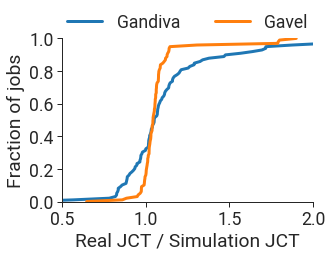

In [8]:
print_ratios_and_plot(['gandiva', 'min_total_duration'],
                      output_filename="physical_cluster_experiments/makespan_cdf_ratios.pdf")

/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.


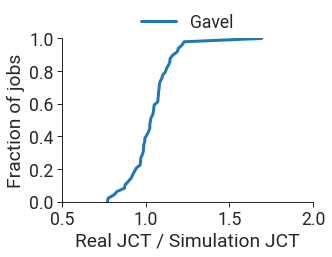

In [9]:
print_ratios_and_plot(['max_min_fairness_perf'],
                      output_filename="physical_cluster_experiments/las_cdf_ratios.pdf")